## Лабораторная работа №1 | Вариант 5

Выполнил: Юхнев Арсений М8О-312Б-23

### 1. Numpy

In [2]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [3]:
a = np.eye(3)
print(a)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


2. Создайте кастомный dtype который описывает цвет состоящий из 4х unsigned bytes(RGBA пиксель)

In [4]:
RGBA_pix = np.dtype([('Red', np.uint8), ('Blue', np.uint8), ('Green', np.uint8), ('Alpha', np.uint8)])

3. Как игнорировать все numpy warnings(не рекомендуем к использованию)?

In [5]:
np.seterr(all='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

4. Создайте случайный вектор размера 10 и отсортируйте его

In [6]:
vec = np.random.rand(10)
vec = np.sort(vec)
print(vec)

[0.01161073 0.02429239 0.02861148 0.03201168 0.12374297 0.12722275
 0.17938362 0.18956535 0.56471465 0.81395232]


5. Создайте read-only массив(неизменяемый)

In [7]:
a = np.array([1, 2, 3, 4, 5])
a.flags.writable = False
a[0] = 10

AttributeError: 'numpy._core.multiarray.flagsobj' object has no attribute 'writable'

6. Рассмотрим случайную матрицу размером 10х2, представляющую декартовы координаты, преобразуем их в полярные координаты

In [19]:
matrix = np.random.rand(10, 2)
x = matrix[0:10, 0]
y = matrix[:, 1]
r = np.sqrt(x ** 2 + y ** 2)
angle = np.arctan2(y, x)
polar = np.column_stack((r, angle))
print(polar)

[[0.75065896 1.14245512]
 [0.55553433 0.22452596]
 [0.45825094 0.60668748]
 [0.9386652  1.51709697]
 [1.05136914 0.9952458 ]
 [0.93796876 0.56496557]
 [1.03880962 0.82537958]
 [1.06368822 0.81341336]
 [1.06165227 0.41871912]
 [1.30019657 0.78668198]]


7. Создайте структурированный массив с координатами x и y, охватывающий область [0,1]x[0,1]

In [20]:
n_points = 10
x = np.linspace(0, 1, n_points)
y = np.linspace(0, 1, n_points)
X, Y = np.meshgrid(x, y)
dtype = [('x', 'float64'), ('y', 'float64')]
coordinates = np.zeros(X.shape, dtype=dtype)
coordinates['x'] = X
coordinates['y'] = Y

print(coordinates)

[[(0.        , 0.        ) (0.11111111, 0.        )
  (0.22222222, 0.        ) (0.33333333, 0.        )
  (0.44444444, 0.        ) (0.55555556, 0.        )
  (0.66666667, 0.        ) (0.77777778, 0.        )
  (0.88888889, 0.        ) (1.        , 0.        )]
 [(0.        , 0.11111111) (0.11111111, 0.11111111)
  (0.22222222, 0.11111111) (0.33333333, 0.11111111)
  (0.44444444, 0.11111111) (0.55555556, 0.11111111)
  (0.66666667, 0.11111111) (0.77777778, 0.11111111)
  (0.88888889, 0.11111111) (1.        , 0.11111111)]
 [(0.        , 0.22222222) (0.11111111, 0.22222222)
  (0.22222222, 0.22222222) (0.33333333, 0.22222222)
  (0.44444444, 0.22222222) (0.55555556, 0.22222222)
  (0.66666667, 0.22222222) (0.77777778, 0.22222222)
  (0.88888889, 0.22222222) (1.        , 0.22222222)]
 [(0.        , 0.33333333) (0.11111111, 0.33333333)
  (0.22222222, 0.33333333) (0.33333333, 0.33333333)
  (0.44444444, 0.33333333) (0.55555556, 0.33333333)
  (0.66666667, 0.33333333) (0.77777778, 0.33333333)
  (0.8888

8. Учитывая два массива X и Y, постройте матрицу Коши $C$ ($C_{ij} =\frac{1}{x_i - y_j}$)

In [26]:
x = np.random.normal(size=(5))
y = np.random.normal(size=(5))
def Coshi_func(i, j):
    eps=1e-12
    i = i.astype(int)
    j = j.astype(int)
    denom = x[i] - y[j]
    return np.where(np.abs(denom) < eps, 1 / eps, 1 / denom)

coshi = np.fromfunction(Coshi_func, (len(x), len(y)), dtype=float)
print(coshi)

[[  0.37357822   1.61383297   0.45392294   1.18953432   0.57465085]
 [  0.54838529  -4.28013802   0.7408851  -79.27054074   1.12751398]
 [  0.60302918  -2.50703094   0.84424087  -5.62252908   1.38568241]
 [  1.18135237  -0.82597851   2.68320214  -1.01044502 -11.09373494]
 [  0.33627721   1.09103095   0.40000983   0.87905397   0.49089185]]


9. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [27]:
arr_float = np.array([1.5, 2.7, 3.1, 4.9], dtype=np.float32)
print(arr_float, arr_float.dtype)
arr_int = arr_float.view(np.int32)
print(arr_int, arr_int.dtype)

[1.5 2.7 3.1 4.9] float32
[1069547520 1076677837 1078355558 1084017869] int32


10. Как случайно заменить p элементов в 2D массиве?

In [30]:
a = np.arange(15)
p = 4
np.put(a, np.random.choice(range(a.size), p, replace=False), 1000)
print(a)

[1000 1000    2    3    4    5    6 1000    8    9   10   11   12 1000
   14]


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Классический начальный набор данных - данные пассажиров титаника.

Файл: `data.csv`

```
PassangerId - уникальный номер пассажира
Survived - выжил человек или нет
Pclass - класс обслуживания
Name - имя человека, обращение к ней/нему
Sex - пол человека
Age - возраст на момент крушения
SibSp - количество братьев и сестер / супругов на борту "Титаника"
Parch - количество родителей / детей на борту "Титаника"
Ticket - номер билета
Fare - стоимость проезда для пассажиров
Cabin - каюта
Embarked - причал отбытия. C = Cherbourg Q = Queenstown S = Southampton
```

In [31]:
import pandas as pd

In [33]:
df = pd.read_csv("data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


1. Узнайте сколько было на борту человек

In [34]:
total_people = df["PassengerId"].count()
print(total_people)

891


2. Какой медианный и средний возраста пассажиров

In [35]:
print(f'Mean age: {df["Age"].mean()}')
print(f'Median age: {df["Age"].median()}')

Mean age: 29.69911764705882
Median age: 28.0


3. Посчитайте процент выживаемости детей(до 16 лет) и взрослых

In [37]:
only_with_age = df[df["Age"].notna()]
children = only_with_age[only_with_age["Age"] < 16]
adults = only_with_age[only_with_age["Age"] >= 16]
children_survived = children["Survived"].mean() * 100
adults_survived = adults["Survived"].mean() * 100
print("Процент выживаемости детей: ", children_survived)
print("Процент выживаемости взрослых: ", adults_survived)

Процент выживаемости детей:  59.036144578313255
Процент выживаемости взрослых:  38.193343898573694


4. Верна ли гипотеза, что женщины и дети сажались в шлюпки первыми и выживали больше?

In [38]:
only_with_age = df[df["Age"].notna()].copy()

def categorize(row):
    if row["Sex"] == "female" or row["Age"] < 16:
        return "Женщины и дети"
    else:
        return "Взрослые мужчины"

only_with_age["Category"] = only_with_age.apply(categorize, axis=1)
print("\nЖенщины/дети vs взрослые мужчины:")
survival_comparison = only_with_age.groupby("Category")["Survived"].mean() * 100
print(survival_comparison)
women_children_rate = survival_comparison["Женщины и дети"]
adult_men_rate = survival_comparison["Взрослые мужчины"]
print(f"\nЖенщины и дети: {women_children_rate:.2f}%")
print(f"Взрослые мужчины: {adult_men_rate:.2f}%")
print(f"Разница: {women_children_rate - adult_men_rate:.1f} процентов")

if women_children_rate > adult_men_rate:
    print(f"\nЖенщины и дети выживали чаще на {women_children_rate - adult_men_rate:.1f}%")
    print("ВЫВОД: Гипотеза верна")
else:
    print(f"\nВзрослые мужчины выживали чаще на {adult_men_rate - women_children_rate:.1f}%")
    print("ВЫВОД: Гипотеза не верна")


Женщины/дети vs взрослые мужчины:
Category
Взрослые мужчины    17.433414
Женщины и дети      72.425249
Name: Survived, dtype: float64

Женщины и дети: 72.43%
Взрослые мужчины: 17.43%
Разница: 55.0 процентов

Женщины и дети выживали чаще на 55.0%
ВЫВОД: Гипотеза верна


5. Зависит ли выживаемость от класса обслуживания?

In [39]:
survival_by_class = df.groupby("Pclass")["Survived"].mean() * 100
class1 = survival_by_class[1]
class2 = survival_by_class[2]
class3 = survival_by_class[3]
print(f"1 класс {class1}%")
print(f"2 класс {class2}%")
print(f"3 класс {class3}%")

if (class1 or class2) > class3:
    print("Зависит")


1 класс 62.96296296296296%
2 класс 47.28260869565217%
3 класс 24.236252545824847%
Зависит


6. Посчитайте средний возраст умерших женщин и мужчин

In [42]:
rip = df[df["Survived"] == 0]
mean_age_rip = rip.groupby("Sex")["Age"].mean()
avg_fem = mean_age_rip.get("female")
avg_m = mean_age_rip.get("male")
print(f"Средний возраст мужчин - {avg_m:.2f}\nСредний возраст женщин - {avg_fem:.2f}")


Средний возраст мужчин - 31.62
Средний возраст женщин - 25.05


7. Различается ли процент выживаемости пассажиров с хотя бы одним родственником на борту и одиночек?

In [43]:
df["Has_Relatives"] = (df["SibSp"] > 0) | (df["Parch"] > 0)
df["Category"] = df["Has_Relatives"].apply(
    lambda x: "С родственниками" if x else "Одиночки")
df["Has_Relatives"] = (df["SibSp"] > 0) | (df["Parch"] > 0)
df["Category"] = df["Has_Relatives"].apply(
    lambda x: "С родственниками" if x else "Одиночки"
)
comparision = df.groupby("Category")["Survived"].mean() * 100
with_siblings = comparision["С родственниками"]
without_siblings = comparision["Одиночки"]

if with_siblings > without_siblings:
    print(f"\nПассажиры с родственниками выживали чаще на {with_siblings - without_siblings:.2f}%")
    print("ВЫВОД: Наличие родственников на борту")
    print("       повышало шансы на спасение.")
else:
    print(f"\nОдиночки выживали чаще на {without_siblings - with_siblings:.2f}%")
    print("ВЫВОД: Пассажиры без родственников")
    print("       имели преимущество в спасении.")


Пассажиры с родственниками выживали чаще на 20.21%
ВЫВОД: Наличие родственников на борту
       повышало шансы на спасение.


8. Различается ли средняя стоимость билета у умерших и выживших пассажиров?

In [44]:
mean_fare = df.groupby("Survived")["Fare"].mean()
died_fare = mean_fare[0]
survived_fare = mean_fare[1]

print(f"\nУмершие: ${died_fare:.2f}")
print(f"Выжившие: ${survived_fare:.2f}")


if survived_fare > died_fare:
    print(f"Выжившие пассажиры платили в среднем на ${survived_fare - died_fare:.2f} больше")
    print("ВЫВОД: Пассажиры с более дорогими билетами")
    print("       имели больше шансов на спасение.")
else:
    print(f"Погибшие пассажиры платили в среднем на ${died_fare - survived_fare:.2f} больше")
    print("ВЫВОД: Пассажиры с более дорогими билетами")
    print("       почему-то выживали хуже (необычно).")


Умершие: $22.12
Выжившие: $48.40
Выжившие пассажиры платили в среднем на $26.28 больше
ВЫВОД: Пассажиры с более дорогими билетами
       имели больше шансов на спасение.


9. Выведите максимальный и минимальный возраст выживших пассажиров во 2 классе обслуживания

In [46]:
class2 = df[(df["Pclass"] == 2) & (df["Survived"] == 1)]["Age"]
print(f"Max {class2.max()}, min {class2.min()}")

Max 62.0, min 0.67


10. Подтвердите или опровергните гипотезу: молодым мужчинам(от 18 лет) выжить легче, чем более взрослым

In [48]:
male = df[df["Sex"] == "male"].copy()
male["Category"] = male["Age"].apply(lambda x: "Молодые" if (x > 18 and x <= 30) else "Взрослые")
survived_males = male.groupby("Category")["Survived"].mean() * 100
young_rate = survived_males.get("Молодые", 0)
adult_rate = survived_males.get("Взрослые", 0)

if young_rate > adult_rate:
    print("Гипотеза правдивая")
    print(f"\nМолодые мужчины (18-30 лет): {young_rate:.1f}%")
    print(f"Взрослые мужчины (30+ лет): {adult_rate:.1f}%")
    print(f"Разница: {young_rate - adult_rate:.1f}% в пользу молодых")
else:
    print("Гипотеза опровергнута")
    print(f"\nМолодые мужчины (18-30 лет): {young_rate:.1f}%")
    print(f"Взрослые мужчины (30+ лет): {adult_rate:.1f}%")
    print(f"Разница: {adult_rate - young_rate:.1f}% в пользу взрослых")

Гипотеза опровергнута

Молодые мужчины (18-30 лет): 15.6%
Взрослые мужчины (30+ лет): 20.4%
Разница: 4.8% в пользу взрослых


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

1. Постройте гистограмму распределения возростов пассажиров

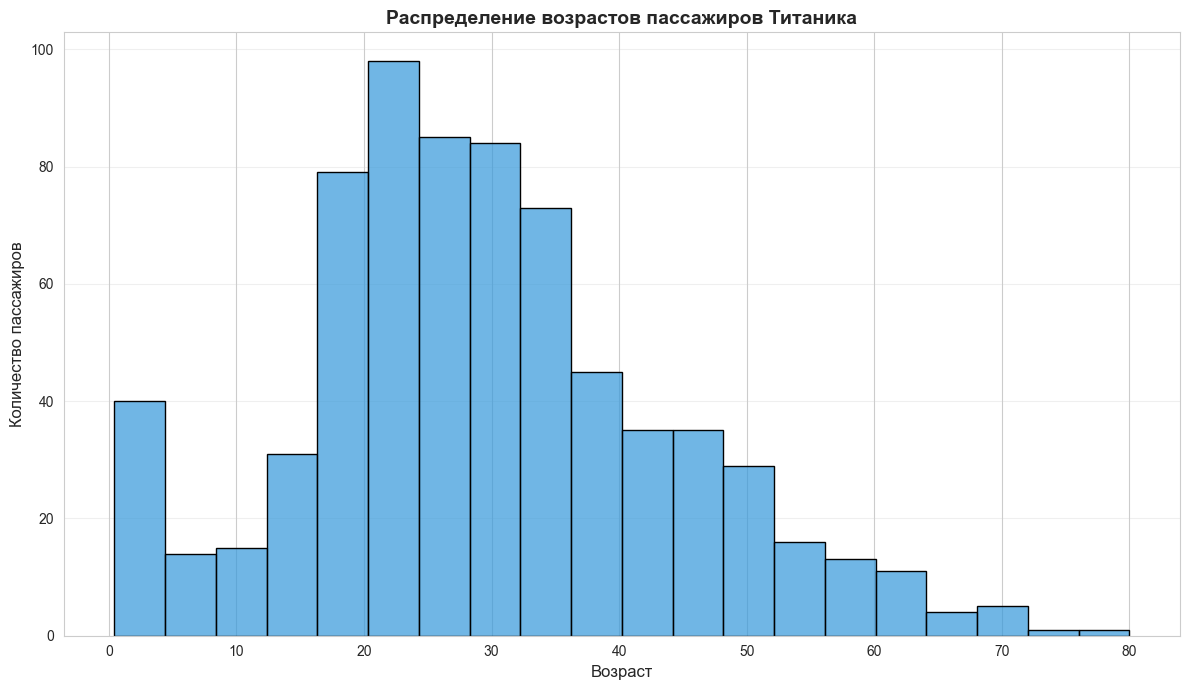

In [49]:

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))
sns.histplot(df["Age"].dropna(), bins=20, color="#3498db", edgecolor="black", alpha=0.7)

plt.xlabel("Возраст", fontsize=12)
plt.ylabel("Количество пассажиров", fontsize=12)
plt.title("Распределение возрастов пассажиров Титаника", fontsize=14, fontweight="bold")
plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

2. Постройте гистограммы распределения цен для пассажиров разных классов

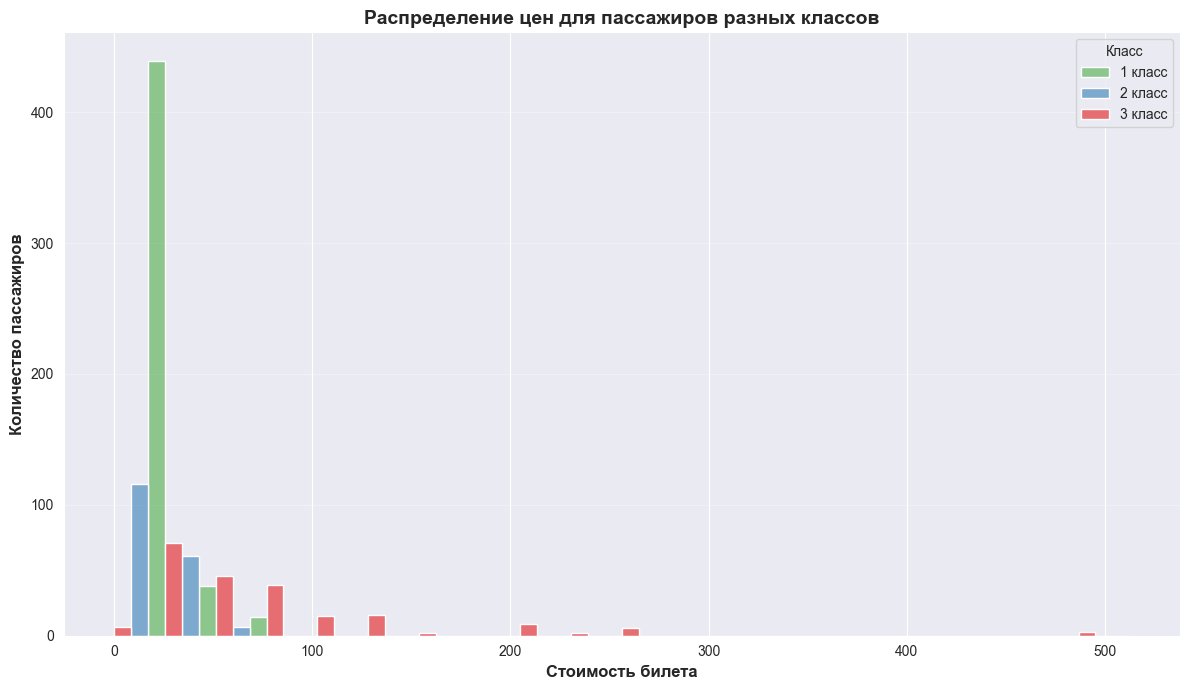

In [51]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 7))

sns.histplot(data=df, x="Fare", hue="Pclass", bins=20,
             palette="Set1", alpha=0.6, edgecolor="white",
             multiple="dodge")

plt.xlabel("Стоимость билета", fontsize=12, fontweight="bold")
plt.ylabel("Количество пассажиров", fontsize=12, fontweight="bold")
plt.title("Распределение цен для пассажиров разных классов",
          fontsize=14, fontweight="bold")
plt.legend(title="Класс", labels=["1 класс", "2 класс", "3 класс"])
plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

3. Постройте зависимость цены от возраста пассажира

4. Постройте box plot отображающий распределение цен на билеты в разных классах

5. Визуализируйте распределение долей выживших среди мужчин, женщин и детей(до 16 лет)

6. Сравните плотности распределения возростов выживших и умерших пассажиров, сделайте выводы

7. Постройте круговую диаграмму отображающую выживаемость мужчин и женщин в разных классах обслуживания(визуализация должна быть интуитивно понятная без объяснений, женщины и мужчины соответствующих классов объеденены визуально в одну группу и 2 подгруппы)*

\* Задание на доп. балл